# Loading the datasets

In [3]:
import pandas as pd

# Load datasets
data_dictionary = pd.read_csv('/content/data_dictionary.csv')
encounters = pd.read_csv('/content/encounters.csv')
organizations = pd.read_csv('/content/organizations.csv')
patients = pd.read_csv('/content/patients.csv')
payers = pd.read_csv('/content/payers.csv')
procedures = pd.read_csv('/content/procedures.csv')


# Summarizing The dataset

In [4]:
def dataset_summary(df, name):
    return pd.DataFrame({
        "Dataset": name,
        "Column": df.columns,
        "Missing Values": df.isna().sum(),
        "Unique Values": df.nunique(),
        "Data Type": df.dtypes
    })

In [5]:
dataset_summary(data_dictionary, "Data Dictionary")

,Dataset,Column,Missing Values,Unique Values,Data Type
Table,Data Dictionary,Table,0,5,object
Field,Data Dictionary,Field,5,40,object
Description,Data Dictionary,Description,0,60,object


In [6]:
dataset_summary(encounters, "Encounters")

,Dataset,Column,Missing Values,Unique Values,Data Type
Id,Encounters,Id,0,27891,object
START,Encounters,START,0,27541,object
STOP,Encounters,STOP,0,27765,object
PATIENT,Encounters,PATIENT,0,974,object
ORGANIZATION,Encounters,ORGANIZATION,0,1,object
PAYER,Encounters,PAYER,0,10,object
ENCOUNTERCLASS,Encounters,ENCOUNTERCLASS,0,6,object
CODE,Encounters,CODE,0,45,int64
DESCRIPTION,Encounters,DESCRIPTION,0,53,object
BASE_ENCOUNTER_COST,Encounters,BASE_ENCOUNTER_COST,0,5,float64


In [7]:
dataset_summary(organizations, "Organizations")

,Dataset,Column,Missing Values,Unique Values,Data Type
Id,Organizations,Id,0,1,object
NAME,Organizations,NAME,0,1,object
ADDRESS,Organizations,ADDRESS,0,1,object
CITY,Organizations,CITY,0,1,object
STATE,Organizations,STATE,0,1,object
ZIP,Organizations,ZIP,0,1,int64
LAT,Organizations,LAT,0,1,float64
LON,Organizations,LON,0,1,float64


In [8]:
dataset_summary(patients, "Patients")

,Dataset,Column,Missing Values,Unique Values,Data Type
Id,Patients,Id,0,974,object
BIRTHDATE,Patients,BIRTHDATE,0,880,object
DEATHDATE,Patients,DEATHDATE,820,148,object
PREFIX,Patients,PREFIX,0,3,object
FIRST,Patients,FIRST,0,842,object
LAST,Patients,LAST,0,498,object
SUFFIX,Patients,SUFFIX,953,3,object
MAIDEN,Patients,MAIDEN,588,279,object
MARITAL,Patients,MARITAL,1,2,object
RACE,Patients,RACE,0,6,object


In [9]:
dataset_summary(payers, "Payers")

,Dataset,Column,Missing Values,Unique Values,Data Type
Id,Payers,Id,0,10,object
NAME,Payers,NAME,0,10,object
ADDRESS,Payers,ADDRESS,1,7,object
CITY,Payers,CITY,1,7,object
STATE_HEADQUARTERED,Payers,STATE_HEADQUARTERED,1,6,object
ZIP,Payers,ZIP,1,7,float64
PHONE,Payers,PHONE,1,8,object


In [10]:
 dataset_summary(procedures, "Procedures")

,Dataset,Column,Missing Values,Unique Values,Data Type
START,Procedures,START,0,39251,object
STOP,Procedures,STOP,0,42263,object
PATIENT,Procedures,PATIENT,0,793,object
ENCOUNTER,Procedures,ENCOUNTER,0,14670,object
CODE,Procedures,CODE,0,157,int64
DESCRIPTION,Procedures,DESCRIPTION,0,163,object
BASE_COST,Procedures,BASE_COST,0,8268,int64
REASONCODE,Procedures,REASONCODE,36945,46,float64
REASONDESCRIPTION,Procedures,REASONDESCRIPTION,36945,46,object


In [9]:
# # Summarize all datasets
# summaries = pd.concat([
#     dataset_summary(data_dictionary, "Data Dictionary"),
#     dataset_summary(encounters, "Encounters"),
#     dataset_summary(organizations, "Organizations"),
#     dataset_summary(patients, "Patients"),
#     dataset_summary(payers, "Payers"),
#     dataset_summary(procedures, "Procedures")
# ])

# # Display the summary
# print(summaries)


# Cleaning the data

In [11]:
# dropping rows with missing values in a specific dataset
patients_cleaned = patients.dropna()

In [12]:
# filling missing values in a column
encounters['REASONDESCRIPTION'].fillna('Unknown', inplace=True)


<ipython-input-12-e3626dd36af9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encounters['REASONDESCRIPTION'].fillna('Unknown', inplace=True)


# Investigating the relationship

In [13]:
merged_data = pd.merge(encounters, patients, left_on='PATIENT', right_on='Id')

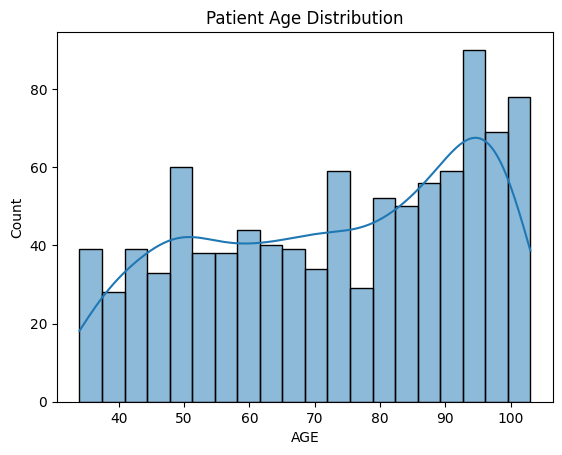

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Patient age distribution
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])
patients['AGE'] = 2025 - patients['BIRTHDATE'].dt.year

sns.histplot(patients['AGE'], bins=20, kde=True)
plt.title("Patient Age Distribution")
plt.show()


In [14]:
encounter_counts = encounters['ENCOUNTERCLASS'].value_counts()
print(encounter_counts)

ENCOUNTERCLASS
ambulatory    12537
outpatient     6300
urgentcare     3666
emergency      2322
wellness       1931
inpatient      1135
Name: count, dtype: int64


# How many patients have been admitted or readmitted over time?

In [15]:
# START column is in datetime format
encounters['START'] = pd.to_datetime(encounters['START'])

# Group by month and count unique patients
admissions_over_time = (
    encounters.groupby(encounters['START'].dt.to_period('M'))['PATIENT']
    .nunique()
    .reset_index()
    .rename(columns={'START': 'Month', 'PATIENT': 'Unique Patients'})
)

# Sort by time for proper chronological order
admissions_over_time = admissions_over_time.sort_values(by='Month')

# Display the result
print(admissions_over_time)



       Month  Unique Patients
0    2011-01               68
1    2011-02               67
2    2011-03               85
3    2011-04               72
4    2011-05               78
..       ...              ...
129  2021-10              119
130  2021-11              134
131  2021-12              110
132  2022-01              103
133  2022-02                1

[134 rows x 2 columns]


<ipython-input-15-0bf5fcc100db>:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  encounters.groupby(encounters['START'].dt.to_period('M'))['PATIENT']


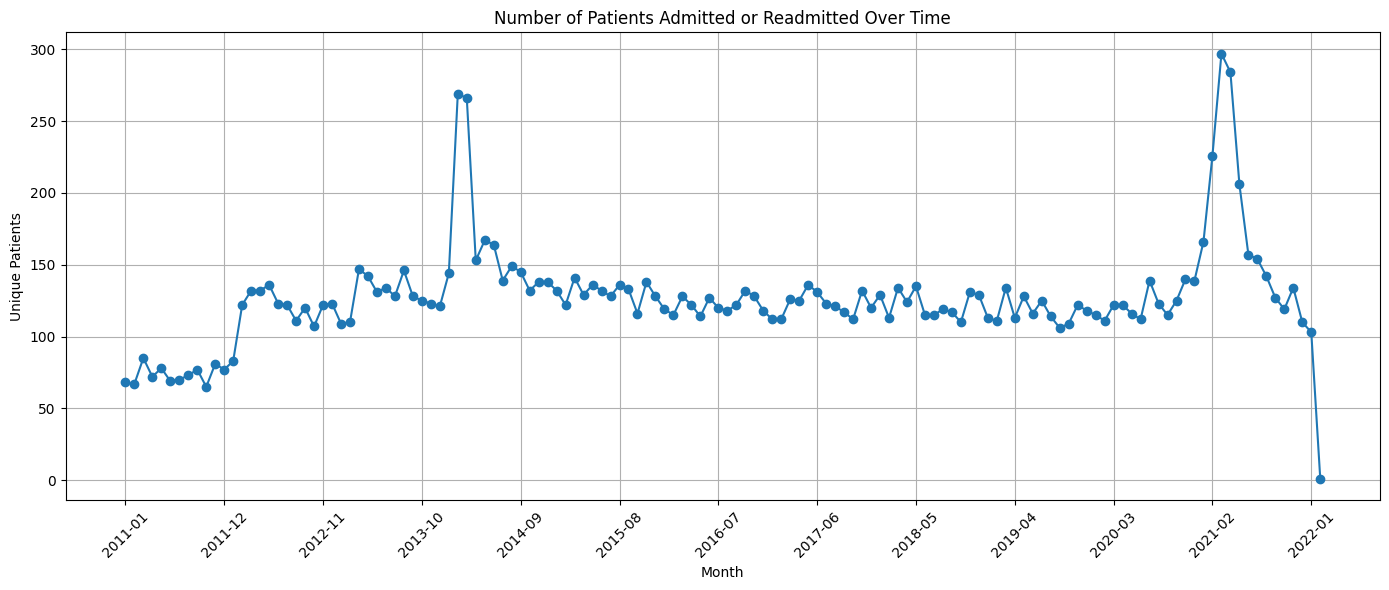

In [16]:
# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(
    admissions_over_time['Month'].astype(str),
    admissions_over_time['Unique Patients'],
    marker='o'
)
plt.title('Number of Patients Admitted or Readmitted Over Time')
plt.xlabel('Month')
plt.ylabel('Unique Patients')
plt.xticks(
    ticks=range(0, len(admissions_over_time), max(1, len(admissions_over_time) // 12)),
    labels=admissions_over_time['Month'].astype(str)[::max(1, len(admissions_over_time) // 12)],
    rotation=45
)
plt.grid()
plt.tight_layout()
plt.show()

# How long are patients staying in the hospital, on average?

In [17]:

# START and STOP columns are in datetime format
encounters['START'] = pd.to_datetime(encounters['START'])
encounters['STOP'] = pd.to_datetime(encounters['STOP'])

# The duration of each encounter in hours (or days if preferred)
encounters['DURATION_HOURS'] = (encounters['STOP'] - encounters['START']).dt.total_seconds() / 3600

# average duration in hours
average_duration_hours = encounters['DURATION_HOURS'].mean()

# average duration in days
average_duration_days = average_duration_hours / 24

print(f"Average hospital stay duration: {average_duration_hours:.2f} hours ({average_duration_days:.2f} days)")


Average hospital stay duration: 7.27 hours (0.30 days)


# How many procedures are covered by insurance?

In [18]:
# Merge procedures with encounters to access PAYER_COVERAGE
merged_data = pd.merge(procedures, encounters, left_on='ENCOUNTER', right_on='Id', how='left')

# Filter for procedures covered by insurance (PAYER_COVERAGE > 0)
covered_procedures = merged_data[merged_data['PAYER_COVERAGE'] > 0]

# Count the number of covered procedures
num_covered_procedures = covered_procedures.shape[0]

print(f"Number of procedures covered by insurance: {num_covered_procedures}")


Number of procedures covered by insurance: 24791


# Patients demograph

In [19]:
# BIRTHDATE is in datetime format
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])

# Calculate age
current_year = pd.Timestamp.now().year
patients['AGE'] = current_year - patients['BIRTHDATE'].dt.year

# Summarizing demographics
gender_distribution = patients['GENDER'].value_counts()
race_distribution = patients['RACE'].value_counts()
ethnicity_distribution = patients['ETHNICITY'].value_counts()

# Displaying summaries
print("Gender Distribution:")
print(gender_distribution)
print("\nRace Distribution:")
print(race_distribution)
print("\nEthnicity Distribution:")
print(ethnicity_distribution)

Gender Distribution:
GENDER
M    494
F    480
Name: count, dtype: int64

Race Distribution:
RACE
white       680
black       163
asian        91
other        16
hawaiian     13
native       11
Name: count, dtype: int64

Ethnicity Distribution:
ETHNICITY
nonhispanic    783
hispanic       191
Name: count, dtype: int64


In [20]:
import plotly.express as px
import pandas as pd

# Ensure BIRTHDATE is in datetime format
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])

# Extract year of birth
patients['BIRTH_YEAR'] = patients['BIRTHDATE'].dt.year

# Group data by birth year and demographic categories
gender_by_year = patients.groupby(['BIRTH_YEAR', 'GENDER']).size().reset_index(name='COUNT')
race_by_year = patients.groupby(['BIRTH_YEAR', 'RACE']).size().reset_index(name='COUNT')
ethnicity_by_year = patients.groupby(['BIRTH_YEAR', 'ETHNICITY']).size().reset_index(name='COUNT')

# Gender Distribution Plot
fig_gender = px.bar(
    gender_by_year,
    x='GENDER',
    y='COUNT',
    color='GENDER',
    animation_frame='BIRTH_YEAR',
    title="Gender Distribution by Birth Year",
    labels={'GENDER': 'Gender', 'COUNT': 'Number of Patients'},
    text='COUNT',
)
fig_gender.update_layout(xaxis_title="Gender", yaxis_title="Number of Patients", legend_title="Gender")
fig_gender.show()

# Race Distribution Plot
fig_race = px.bar(
    race_by_year,
    x='RACE',
    y='COUNT',
    color='RACE',
    animation_frame='BIRTH_YEAR',
    title="Race Distribution by Birth Year",
    labels={'RACE': 'Race', 'COUNT': 'Number of Patients'},
    text='COUNT',
)
fig_race.update_layout(xaxis_title="Race", yaxis_title="Number of Patients", legend_title="Race")
fig_race.show()

# Ethnicity Distribution Plot
fig_ethnicity = px.bar(
    ethnicity_by_year,
    x='ETHNICITY',
    y='COUNT',
    color='ETHNICITY',
    animation_frame='BIRTH_YEAR',
    title="Ethnicity Distribution by Birth Year",
    labels={'ETHNICITY': 'Ethnicity', 'COUNT': 'Number of Patients'},
    text='COUNT',
)
fig_ethnicity.update_layout(xaxis_title="Ethnicity", yaxis_title="Number of Patients", legend_title="Ethnicity")
fig_ethnicity.show()


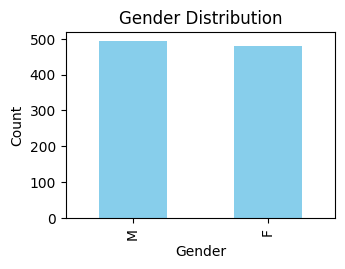

In [21]:
# Gender Distribution
plt.subplot(2, 2, 1)
gender_distribution.plot(kind='bar', color='skyblue')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


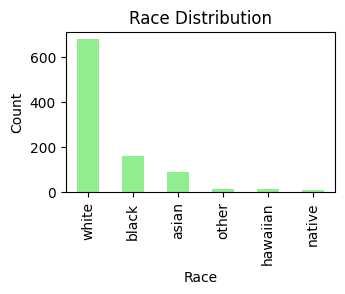

In [34]:
# Race Distribution
plt.subplot(2, 2, 2)
race_distribution.plot(kind='bar', color='lightgreen')
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")


plt.tight_layout()
plt.show()


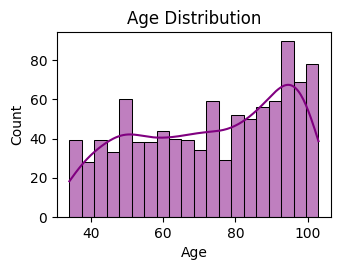

In [35]:
# Age Distribution
plt.subplot(2, 2, 4)
sns.histplot(patients['AGE'], bins=20, kde=True, color='purple')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


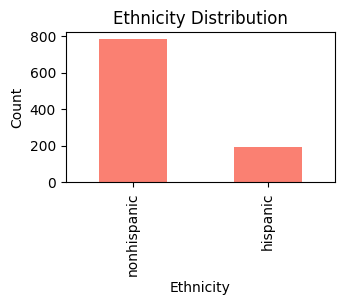

In [37]:
# Ethnicity Distribution
plt.subplot(2, 2, 3)
ethnicity_distribution.plot(kind='bar', color='salmon')
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Top 5 Cities by Patient Count:
CITY
Boston       541
Quincy        80
Cambridge     45
Revere        42
Chelsea       39
Name: count, dtype: int64


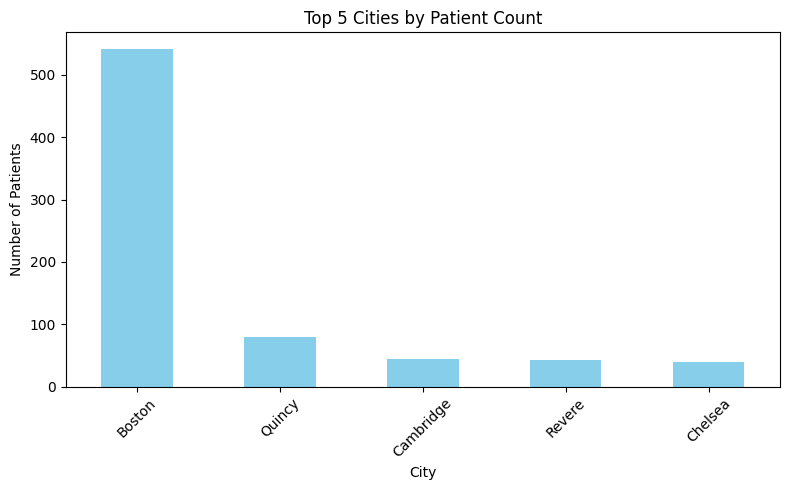

In [39]:
# Count the number of patients in each city
city_counts = patients['CITY'].value_counts()

# Get the top 5 cities
top_5_cities = city_counts.head(5)

# Display the result
print("Top 5 Cities by Patient Count:")
print(top_5_cities)

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
top_5_cities.plot(kind='bar', color='skyblue')
plt.title("Top 5 Cities by Patient Count")
plt.xlabel("City")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Marital Status Distribution:
MARITAL
M    784
S    189
Name: count, dtype: int64


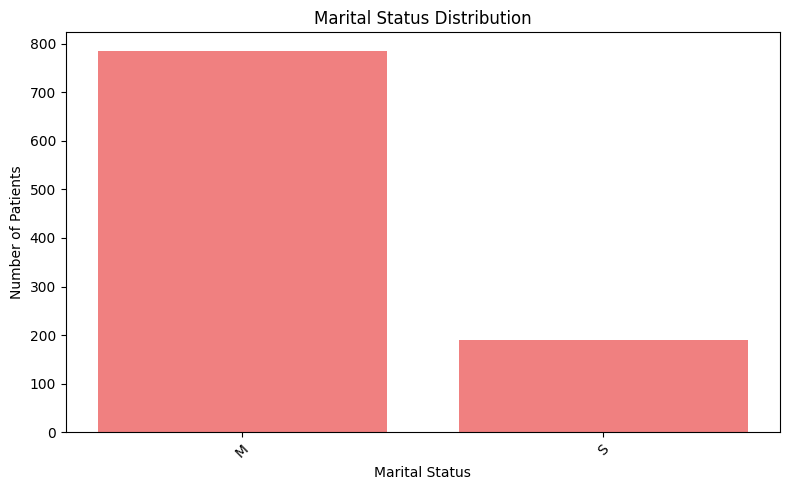

In [40]:
# Count the occurrences of each marital status
marital_status_counts = patients['MARITAL'].value_counts()

# Display the counts
print("Marital Status Distribution:")
print(marital_status_counts)

# Plot the data
plt.figure(figsize=(8, 5))
bars = plt.bar(marital_status_counts.index, marital_status_counts.values, color='lightcoral')

# Chart details
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Diagnostics:
REASONDESCRIPTION
Unknown                                        19541
Chronic congestive heart failure (disorder)     1738
Hyperlipidemia                                  1565
Normal pregnancy                                1341
Viral sinusitis (disorder)                       732
Malignant neoplasm of breast (disorder)          723
Acute viral pharyngitis (disorder)               400
Acute bronchitis (disorder)                      352
Alzheimer's disease (disorder)                   191
Sinusitis (disorder)                             115
Name: count, dtype: int64


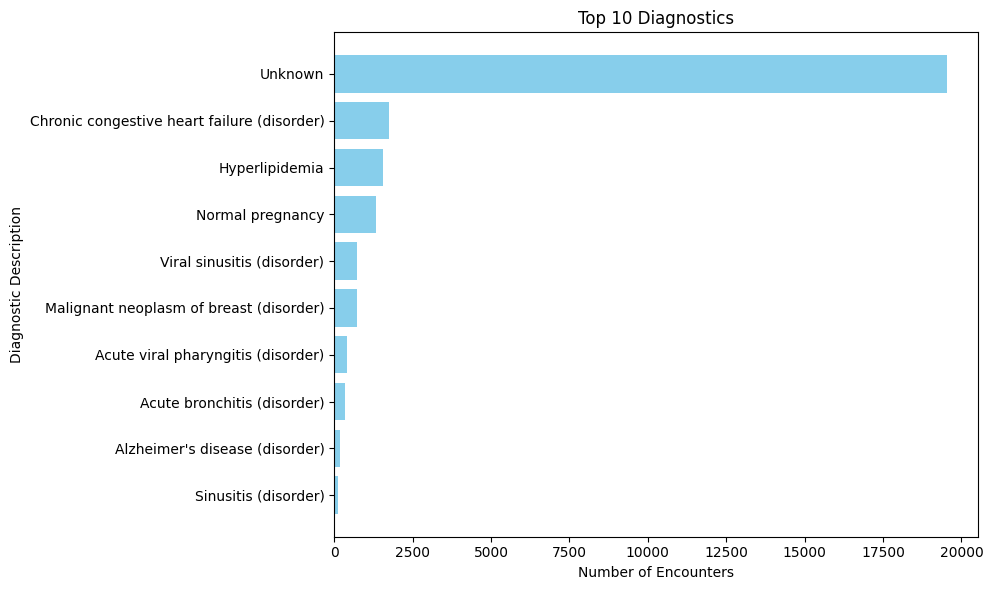

In [43]:
# Count the most frequent diagnostics
top_diagnostics = encounters['REASONDESCRIPTION'].value_counts().head(10)

# Display the result
print("Top 10 Diagnostics:")
print(top_diagnostics)

# Plot the top diagnostics
plt.figure(figsize=(10, 6))
bars = plt.barh(top_diagnostics.index[::-1], top_diagnostics.values[::-1], color='skyblue')

# Chart details
plt.title("Top 10 Diagnostics")
plt.xlabel("Number of Encounters")
plt.ylabel("Diagnostic Description")
plt.tight_layout()
plt.show()


In [24]:
import plotly.express as px

# Ensure START is in datetime format and extract the year
encounters['START'] = pd.to_datetime(encounters['START'])
encounters['YEAR'] = encounters['START'].dt.year

# Group by year and diagnostic description, then count occurrences
diagnostics_by_year = encounters.groupby(['YEAR', 'REASONDESCRIPTION']).size().reset_index(name='COUNT')

# Filter for the top 10 diagnostics overall
top_10_diagnostics = encounters['REASONDESCRIPTION'].value_counts().head(10).index
diagnostics_by_year = diagnostics_by_year[diagnostics_by_year['REASONDESCRIPTION'].isin(top_10_diagnostics)]

# Create an interactive bar chart with year-wise slicing
fig = px.bar(
    diagnostics_by_year,
    x='REASONDESCRIPTION',
    y='COUNT',
    color='REASONDESCRIPTION',
    animation_frame='YEAR',
    title="Top 10 Diagnostics Year-Wise",
    labels={'REASONDESCRIPTION': 'Diagnostic Description', 'COUNT': 'Number of Encounters'},
    text='COUNT',
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Diagnostic Description",
    yaxis_title="Number of Encounters",
    legend_title="Diagnostic Description",
    xaxis={'categoryorder': 'total descending'},
)

# Show the interactive chart
fig.show()


Total Encounters by Class:
ENCOUNTERCLASS
ambulatory    12537
outpatient     6300
urgentcare     3666
emergency      2322
wellness       1931
inpatient      1135
Name: count, dtype: int64


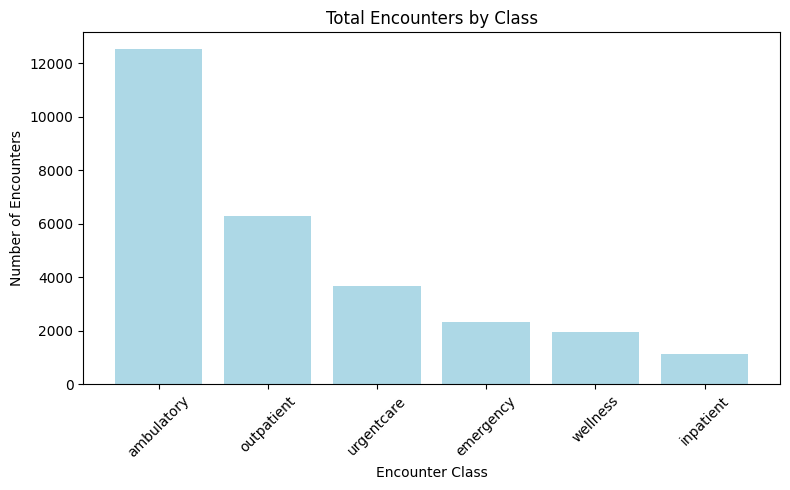

In [44]:
import matplotlib.pyplot as plt

# Count the number of encounters by encounter class
encounter_class_counts = encounters['ENCOUNTERCLASS'].value_counts()

# Display the result
print("Total Encounters by Class:")
print(encounter_class_counts)

# Plot the total encounters by class
plt.figure(figsize=(8, 5))
bars = plt.bar(encounter_class_counts.index, encounter_class_counts.values, color='lightblue')

# Chart details
plt.title("Total Encounters by Class")
plt.xlabel("Encounter Class")
plt.ylabel("Number of Encounters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
import plotly.express as px

# Extract the year from the START column
encounters['YEAR'] = encounters['START'].dt.year

# Group by year and encounter class, and count occurrences
encounter_class_by_year = encounters.groupby(['YEAR', 'ENCOUNTERCLASS']).size().reset_index(name='COUNT')

# Create an interactive bar plot using Plotly
fig = px.bar(
    encounter_class_by_year,
    x='ENCOUNTERCLASS',
    y='COUNT',
    color='ENCOUNTERCLASS',
    animation_frame='YEAR',  # Slices by year
    title="Total Encounters by Class (Interactive Year Slice)",
    labels={'ENCOUNTERCLASS': 'Encounter Class', 'COUNT': 'Number of Encounters'},
    text='COUNT',
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Encounter Class",
    yaxis_title="Number of Encounters",
    legend_title="Encounter Class",
    xaxis={'categoryorder': 'total descending'},
)

# Display the interactive plot
fig.show()
